In [1]:
import pandas as pd
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import os
import json

# Split Error Annotation

## Comparison

In [876]:
species = "fly"
filename = "merge_comparison_results_20250729_123328.json"
with open(f"./output/{species}_merge_2048nm/{filename}", "r") as f:
    results = json.load(f)


In [404]:
len(results)

304

720575940638214461


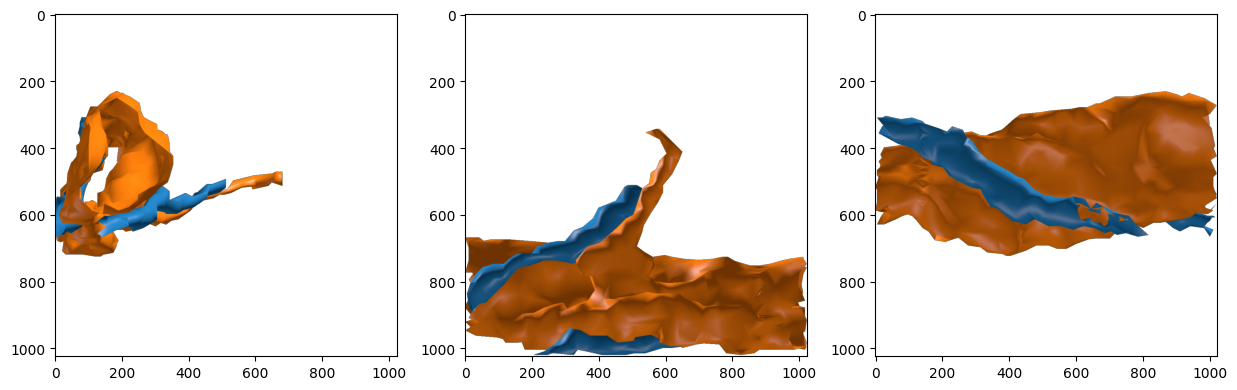

720575940623421686


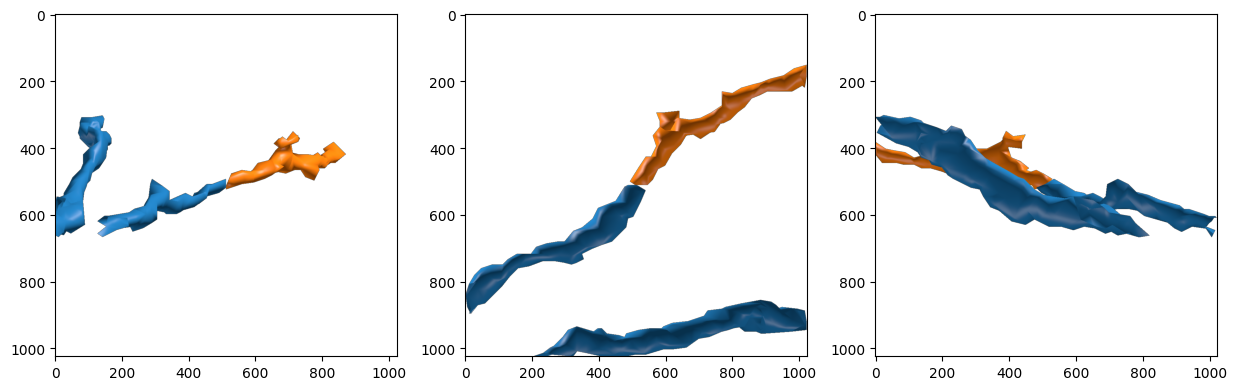

In [511]:
neuron_idx =51


for i in range(len(results[neuron_idx]['prompt_options'])):
    results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['front']

    front_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['front']
    side_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['side']
    top_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['top']

    front_img = np.asarray(Image.open(front_path))
    side_img = np.asarray(Image.open(side_path))
    top_img = np.asarray(Image.open(top_path))
    print(results[neuron_idx]['prompt_options'][i]['id'])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(front_img)
    ax[1].imshow(side_img)
    ax[2].imshow(top_img)
    plt.show()


Instructions: Iterate through all of the indexes in results. For each one, pick the better orange continuation from the blue mesh. In the cell below, put it in the manual_choice field. Also, under difficulty, put 0 if it's clear that the orange mesh is a continuation of the blue mesh. Put 1 if it's not clear that the orange mesh is a continuation of the blue mesh but you think it is. Put 2 if you don't think either orange mesh is a continuation of the blue mesh.

In [512]:
results[neuron_idx]['manual_choice'] = "720575940623421686"
results[neuron_idx]['difficulty'] = 0

In [504]:
filename_human = "comparison_manual_anotation.json"
with open(f"./output/{species}_merge_2048nm/{filename_human}", "w") as f:
    json.dump(results, f, indent=2)

In [878]:
species = "fly"
filename = "comparison_manual_anotation.json"
with open(f"./output/{species}_merge_2048nm/{filename}", "r") as f:
    results = json.load(f)

In [879]:
np.mean([str(r['correct_answer'][0])==str(r['manual_choice']) for r in results if "manual_choice" in r])

np.float64(0.9591836734693877)

## Identification

In [606]:
species = "fly"
filename = "merge_identification_results_20250729_124304.json"
with open(f"./output/{species}_merge_2048nm/{filename}", "r") as f:
    results = json.load(f)
np.random.seed(43)
rearranged_idx = list(np.random.permutation([i for i in range(len(results))]))

In [607]:
len(results)

558

720575940620059141


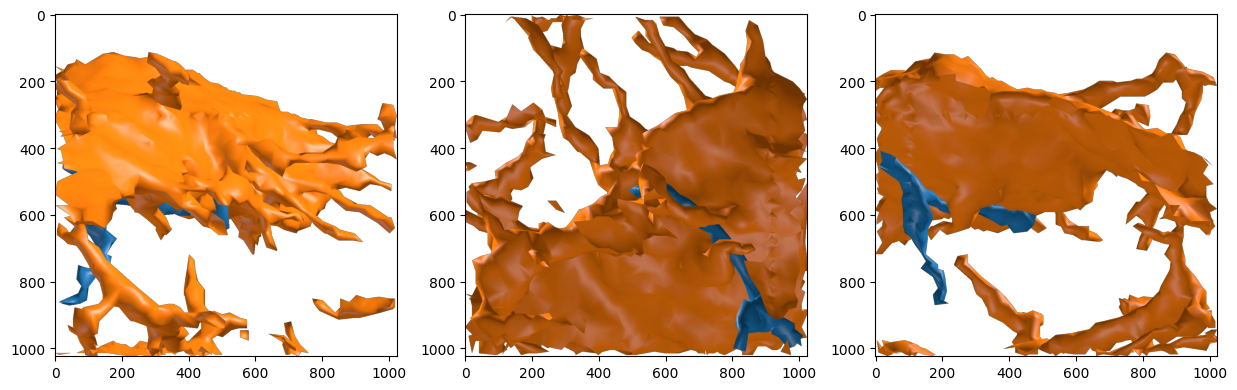

In [706]:
hidden_idx =49
neuron_idx = rearranged_idx[hidden_idx]

for i in range(len(results[neuron_idx]['prompt_options'])):
    if results[neuron_idx]['prompt_options'][i]['id'] !=  results[neuron_idx]["id"]:
        continue
    results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['front']

    front_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['front']
    side_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['side']
    top_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['top']

    front_img = np.asarray(Image.open(front_path))
    side_img = np.asarray(Image.open(side_path))
    top_img = np.asarray(Image.open(top_path))
    print(results[neuron_idx]['prompt_options'][i]['id'])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(front_img)
    ax[1].imshow(side_img)
    ax[2].imshow(top_img)
    plt.show()


Instructions: Iterate through all of the indexes in results. For each one, pick whether or not the orange mesh is a continuation of the blue mesh. In the cell below, put True if it is, and False if it is not. Also, under difficulty, put 0 if it's clear that the orange mesh is or is not a continuation of the blue mesh. Put 1 if it's not clear whether or not the orange mesh is a continuation of the blue mesh. (Also, it's been randomly shuffled to prevent ordering bias)

In [707]:
results[neuron_idx]['manual_choice'] =False 
results[neuron_idx]['difficulty'] = 0

In [708]:
filename_human = "identification_manual_anotation.json"
with open(f"./output/{species}_merge_2048nm/{filename_human}", "w") as f:
    json.dump(results, f, indent=2)

In [709]:
np.mean([r['is_correct_merge'] == r['manual_choice'] for r in results if "manual_choice" in r])

np.float64(0.84)

# Merge Error Annotation

## Comparison

In [710]:
species = "fly"
filename = "split_comparison_results_20250729_130113.json"
with open(f"./output/{species}_split/{filename}", "r") as f:
    results = json.load(f)

In [711]:
len(results)

274

720575940613342623


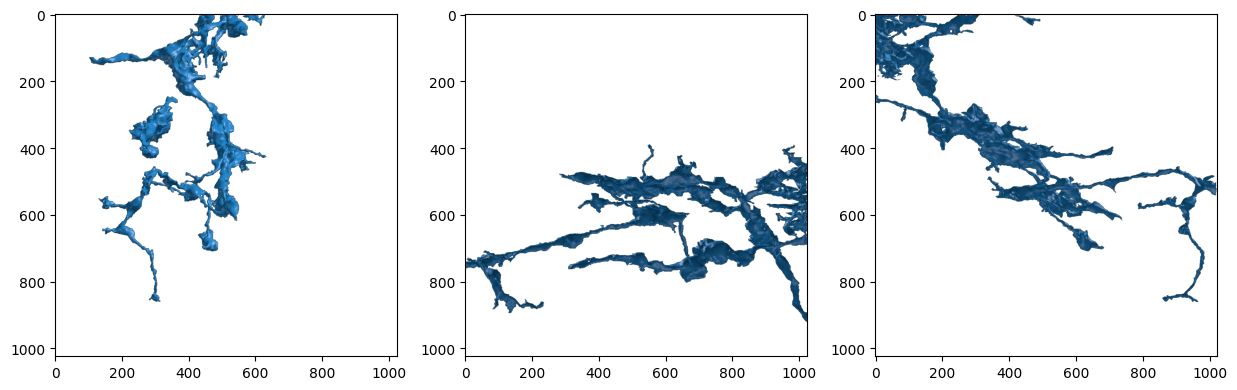

720575940630334658


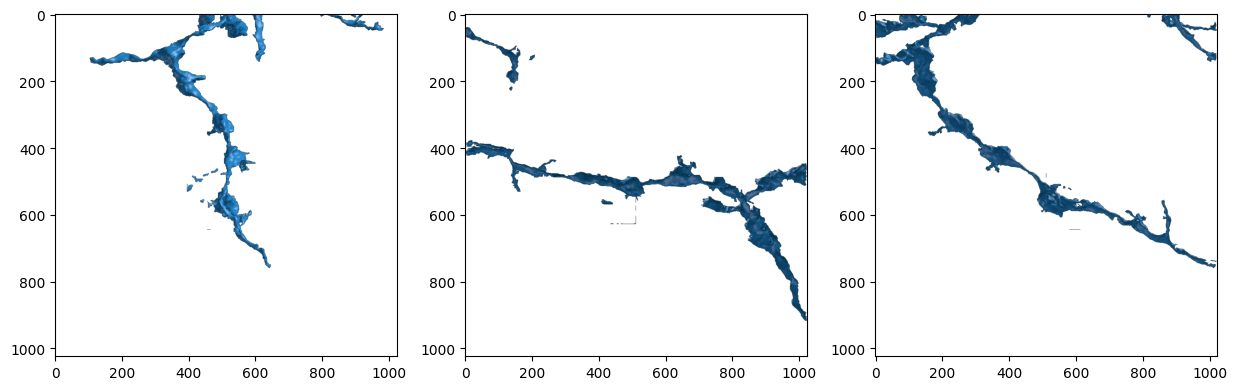

In [767]:
neuron_idx =50


for i in range(len(results[neuron_idx]['prompt_options'])):
    results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['front']

    front_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['front']
    side_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['side']
    top_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['top']

    front_img = np.asarray(Image.open(front_path))
    side_img = np.asarray(Image.open(side_path))
    top_img = np.asarray(Image.open(top_path))
    print(results[neuron_idx]['prompt_options'][i]['id'])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(front_img)
    ax[1].imshow(side_img)
    ax[2].imshow(top_img)
    plt.show()

Instructions: Iterate through all of the indexes in results. For each one, pick the blue mesh that has a merge error. In the cell below, put it in the manual_choice field. Also, under difficulty, put 0 if it's clear that the blue mesh has a merge error. Put 1 if it's not clear that there is a merge error but you think there is. Put 2 if you don't think there is a merge error.

In [768]:
results[neuron_idx]['manual_choice'] = "720575940613342623"
results[neuron_idx]['difficulty'] = 0

In [769]:
np.mean([r['root_id_requires_split']==r['manual_choice'] for r in results if "manual_choice" in r])

np.float64(0.7272727272727273)

In [770]:
filename_human = "comparison_manual_anotation.json"
with open(f"./output/{species}_split/{filename_human}", "w") as f:
    json.dump(results, f, indent=2)

## Identification

In [771]:
species = "fly"
filename = "split_identification_results_20250729_131627.json"
with open(f"./output/{species}_split/{filename}", "r") as f:
    results = json.load(f)
np.random.seed(42)
rearranged_idx = list(np.random.permutation([i for i in range(len(results))]))

In [772]:
len(results)

274

720575940625875600


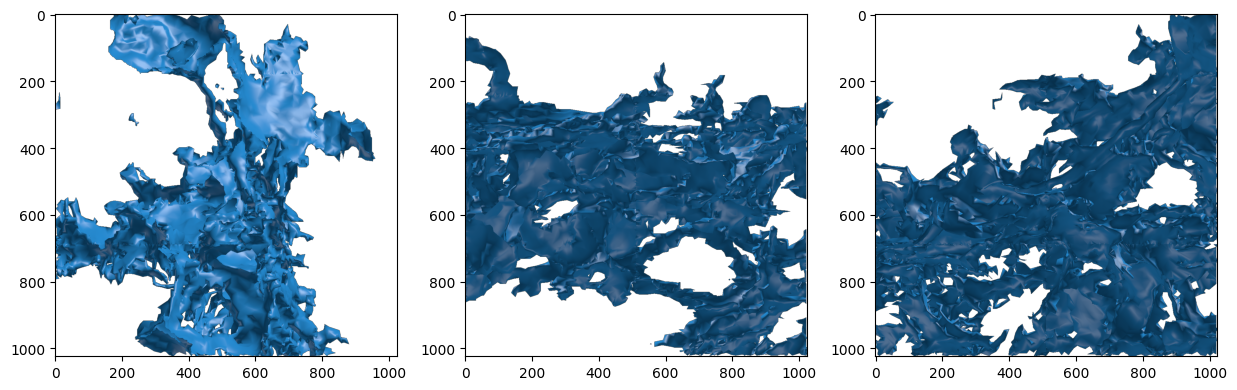

In [873]:
hidden_idx =49
neuron_idx = rearranged_idx[hidden_idx]

for i in range(len(results[neuron_idx]['prompt_options'])):
    if results[neuron_idx]['prompt_options'][i]['id'] !=  results[neuron_idx]["id"]:
        continue
    results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['front']

    front_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['front']
    side_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['side']
    top_path = results[neuron_idx]['prompt_options'][i]['paths']['zoomed']['top']

    front_img = np.asarray(Image.open(front_path))
    side_img = np.asarray(Image.open(side_path))
    top_img = np.asarray(Image.open(top_path))
    print(results[neuron_idx]['prompt_options'][i]['id'])
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(front_img)
    ax[1].imshow(side_img)
    ax[2].imshow(top_img)
    plt.show()


Instructions: Iterate through all of the indexes in results. For each one, pick whether or not the blue mesh has a merge error. In the cell below, put True if it does, and False if it does not. Also, under difficulty, put 0 if it's clear that the blue mesh does or does not have a merge error. Put 1 if it's not clear whether or not the blue mesh has a merge error. (Also, it's been randomly shuffled to prevent ordering bias)

In [874]:
results[neuron_idx]['manual_choice'] = True
results[neuron_idx]['difficulty'] = 0

In [875]:
np.mean([r['is_split']==r['manual_choice'] for r in results if "manual_choice" in r])

np.float64(0.7)

In [53]:
filename_human = "identification_manual_anotation.json"
with open(f"./output/{species}_split/{filename_human}", "w") as f:
    json.dump(results, f, indent=2)

720575940622990087


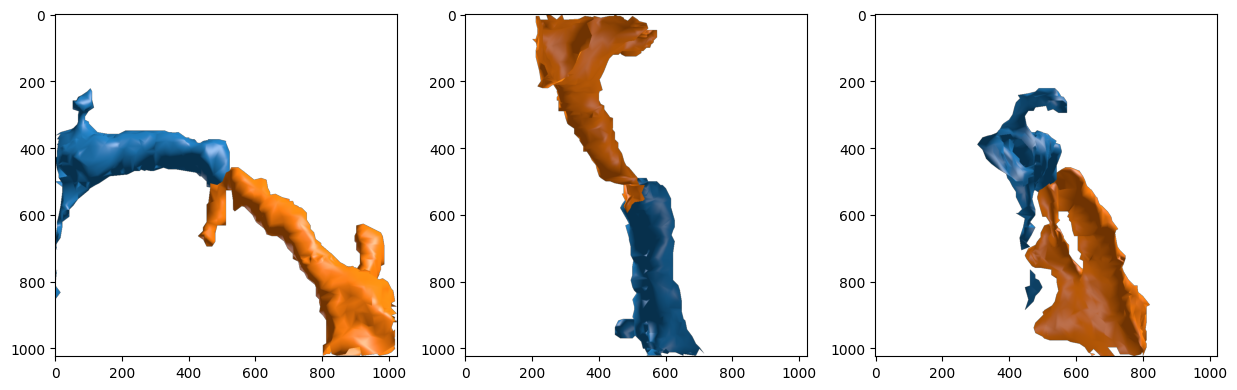

In [6]:



front_path = "output/mouse_merge_2048nm/merge_864691136019768226_745479_929712_895104/option_864691135214939718_with_base_zoomed_front.png"
side_path = "output/mouse_merge_2048nm/merge_864691136019768226_745479_929712_895104/option_864691135214939718_with_base_zoomed_side.png"
top_path = "output/mouse_merge_2048nm/merge_864691136019768226_745479_929712_895104/option_864691135214939718_with_base_zoomed_top.png"
front_img = np.asarray(Image.open(front_path))
side_img = np.asarray(Image.open(side_path))
top_img = np.asarray(Image.open(top_path))
print(results[neuron_idx]['prompt_options'][i]['id'])
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(front_img)
ax[1].imshow(side_img)
ax[2].imshow(top_img)
plt.show()
